In [86]:
# Iportando librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## **1. Cargando el dataframe**

In [87]:
os.getcwd() # Obtener la carpeta como de raiz

df = pd.read_excel('data/Retail_Invoices.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [88]:
print(f'El dataframe tiene un total de {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe tiene un total de 22190 filas y 6 columnas


## **2. EDA**

### **2.1 Revisión columnas**

In [89]:
# Identificando los tipos de datos y viendo si hay nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


### **Insight**:

- No hay datos nulos.
- InvoiceNo es obj cuando deberia ser numérico.
- Tenemos la mayoría de datos numéricos

In [90]:
# Convirtiendo a numérico InvoiceNo

try:
    
    df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

except:
    
    df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.replace(r'[a-zA-Z]+', '', regex=True).astype('int')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  int64         
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


### **2.2 Duplicados**

In [92]:
total_duplicados = df.duplicated().sum()

print(f'El total de duplicados es de {total_duplicados}')

El total de duplicados es de 0


In [93]:
numeric_cols = df.drop(columns='InvoiceDate', axis=1).columns.to_list()
numeric_cols

['InvoiceNo', 'CustomerID', 'Quantity', 'price_total', 'StockCode']

## **3. ESTADÍSTICAS PRINCIPALES**

In [94]:
df[numeric_cols[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,22190.0,15238.498738,1733.149624,12346.0,13755.0000,15136.000,16746.0000,18287.0
Quantity,22190.0,221.130599,1170.215301,-80995.0,30.0000,120.000,254.0000,80995.0
price_total,22190.0,374.045327,2018.482869,-168469.6,87.9625,241.505,418.0225,168469.6
StockCode,22190.0,18.333889,23.892111,1.0,3.0000,12.000,24.0000,542.0


**Insights**:

1.  Lo primero que salta a la vista es los valores negativos tanto de Quantity y price_total los que no tienen sentido en el contexto de nuestro problema

2.  Igual puede ser que los valores maximos esten muy altos... pero primero tendremos que sacar los negativos para evitar la influencia de estos en la media.

3.  Hay un usuario que se llevo 542 objetos distintos lo que parece bastante extraño

In [95]:
for col in numeric_cols:
    print(f'\n Para la columna {col} existen {len(df[col].unique())} registros distintos')
    print(f'=='*30)




 Para la columna InvoiceNo existen 22190 registros distintos

 Para la columna CustomerID existen 4372 registros distintos

 Para la columna Quantity existen 1594 registros distintos

 Para la columna price_total existen 16534 registros distintos

 Para la columna StockCode existen 199 registros distintos


### **3.1. price_total y**

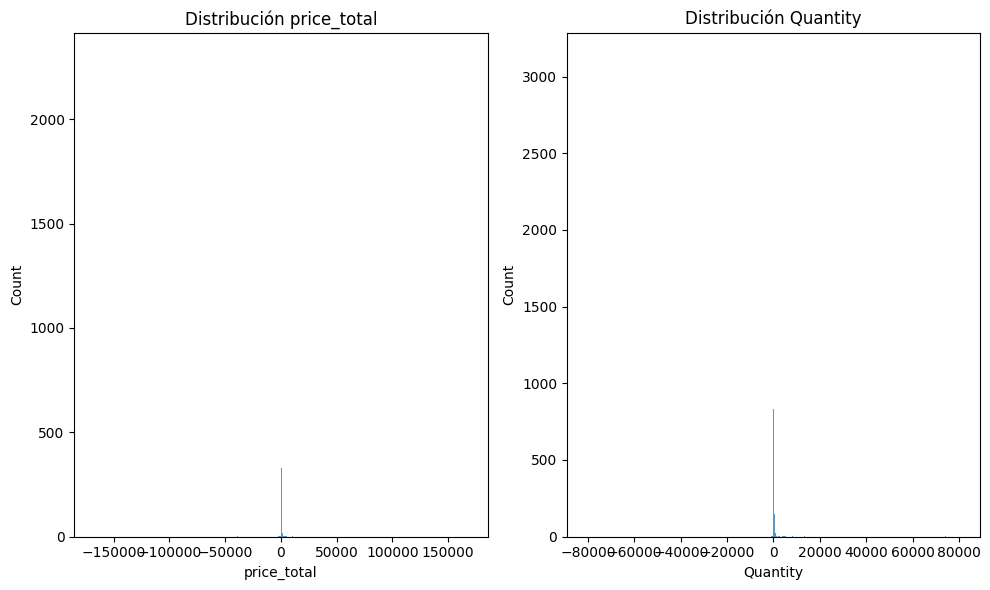

In [96]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.histplot(df['price_total'])
plt.title('Distribución price_total')

# Gráfico 2
plt.subplot(122) 
sns.histplot(df['Quantity'])
plt.title('Distribución Quantity')

plt.tight_layout()
plt.show()

Es claro que existen dratos que son demasiado alejados de la tendencia real de estos por eso nuestros gráficos se ven de esa manera.

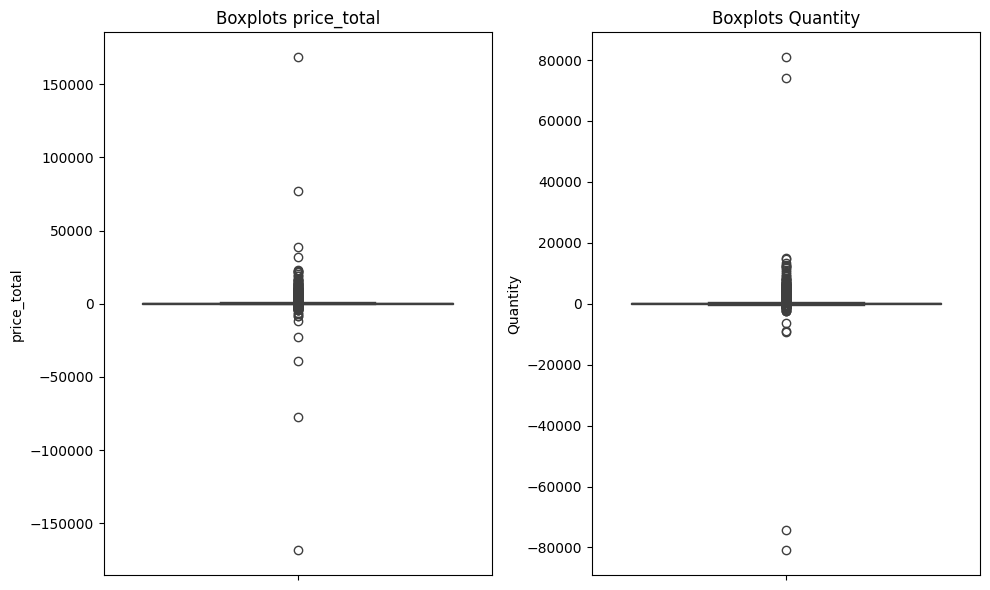

In [97]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.boxplot(df['price_total'])
plt.title('Boxplots price_total')

# Gráfico 2
plt.subplot(122) 
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')

plt.tight_layout()
plt.show()

En los boxplots también se observa lo mismo, existen outliers tanto positivos como negativos

In [98]:
def outliers_index(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)


    indices_atipicos = df[col].index[(df[col] < lower_bound) | (df[col] > upper_bound)].tolist()
    return indices_atipicos

In [99]:
outliers_index_pricetotal = outliers_index(df, 'price_total')

df.iloc[outliers_index_pricetotal, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
26,536394,2010-12-01,13408,544,1024.68,11
54,536477,2010-12-01,16210,1070,2474.74,14
71,536531,2010-12-01,15485,416,950.09,23
...,...,...,...,...,...,...
22000,579195,2011-11-28,14096,-1,-987.14,1
22120,580726,2011-12-05,14096,-1,-1100.44,1
22145,580954,2011-12-06,12967,-194,-436.20,13
22150,580971,2011-12-06,14298,-322,-664.86,3


In [100]:
outliers_index_quantity = outliers_index(df, 'Quantity')

df.iloc[outliers_index_quantity, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
48,536437,2010-12-01,13694,1004,842.12,6
54,536477,2010-12-01,16210,1070,2474.74,14
72,536532,2010-12-01,12433,1852,1919.14,73
...,...,...,...,...,...,...
21976,578363,2011-11-24,15482,-948,-2210.64,12
21980,578377,2011-11-24,14277,-360,-259.20,3
21999,579192,2011-11-28,12657,-390,-491.12,9
22150,580971,2011-12-06,14298,-322,-664.86,3


Vamos a revisar que pasa si convertimos los valores negativos en positivos

In [101]:
df['Quantity'] = df['Quantity'].apply(lambda x: x*(-1) if x < 0 else x)

df['price_total'] = df['price_total'].apply(lambda x: x*(-1) if x < 0 else x)

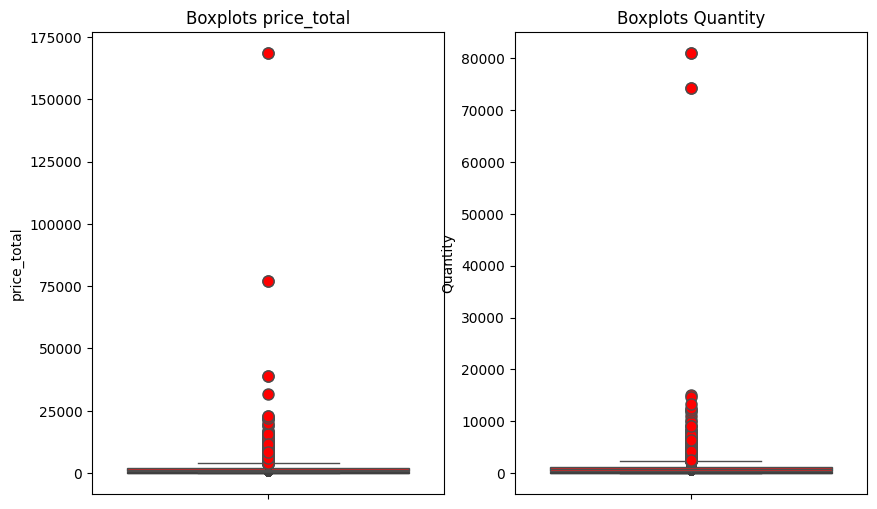

In [102]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()

In [103]:
outliers_index_pricetotal = outliers_index(df, 'price_total')
outliers_index_quantity = outliers_index(df, 'Quantity')


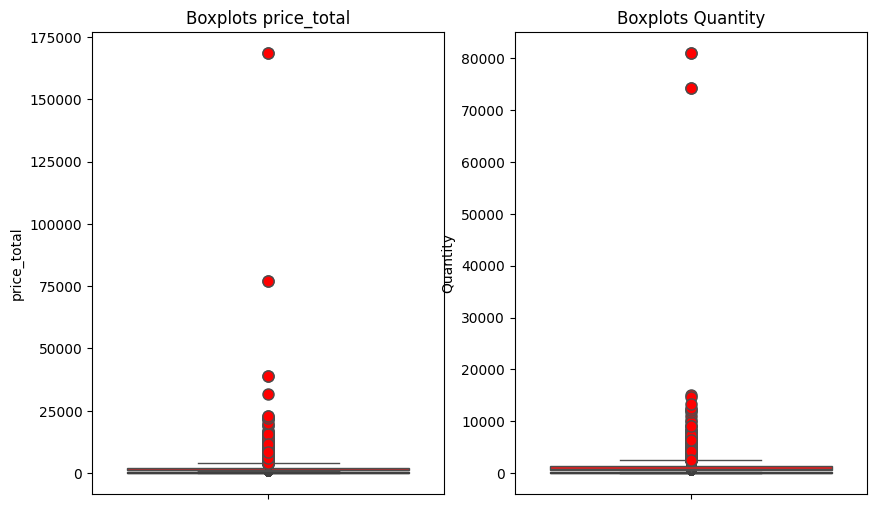

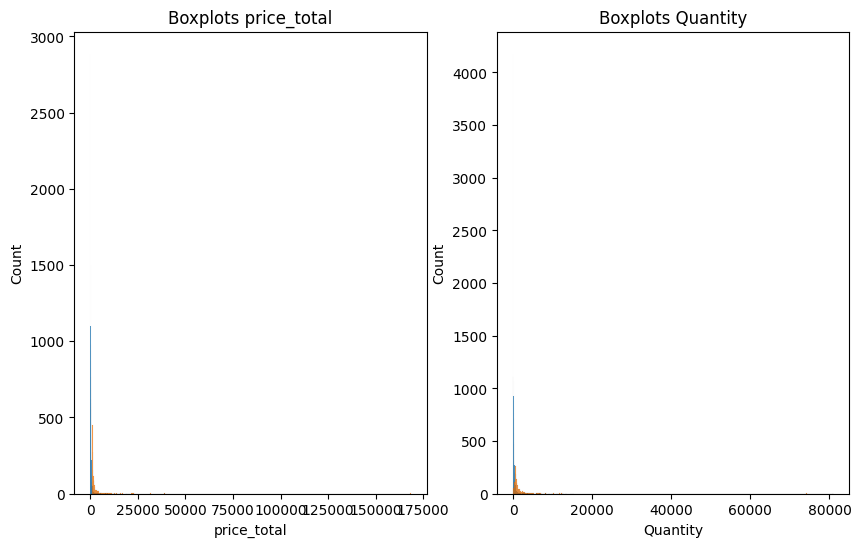

In [104]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')



plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()


# Gráfico 2
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.histplot(df['price_total'])
sns.histplot(df.iloc[outliers_index_pricetotal, :]['price_total'])
                              # Sin línea conectando los outliers,palette='Set2'

plt.title('Boxplots price_total')



plt.subplot(122)
sns.histplot(df['Quantity'])
sns.histplot(df.iloc[outliers_index_pricetotal, :]['Quantity']
                  )
                              # Sin línea conectando los outliers,palette='Set2'

plt.title('Boxplots Quantity')
plt.show()

- Existen datos muy altos en relación a todos los demás por lo que parece bastante probable un problema de inputación de los datos

In [105]:
df.iloc[outliers_index_pricetotal, :].shape

(1610, 6)

In [106]:
df.iloc[outliers_index_quantity, :].shape

(1511, 6)

In [107]:
df.iloc[outliers_index_pricetotal, :].sort_values(by='price_total', ascending=False)

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
22185,581484,2011-12-09,16446,80995,168469.60,1
18503,581483,2011-12-09,16446,80995,168469.60,1
18958,541433,2011-01-18,12346,74215,77183.60,1
1909,541431,2011-01-18,12346,74215,77183.60,1
20237,556445,2011-06-10,15098,1,38970.00,1
...,...,...,...,...,...,...
21715,574922,2011-11-07,15502,291,913.08,15
7866,556241,2011-06-09,12597,445,912.66,48
8479,557798,2011-06-23,16187,812,910.98,47
615,537775,2010-12-08,17722,525,910.14,45


- Algo interesante es ver que en el mismo día aparece la misma cantidad y precio y stockeCode por lo que pueden ser duplicados.
- Como no tenemos la posibilidad de consultar por esto lo tomaremos como duplicado.

In [108]:
columnas_verificar = ["CustomerID", "Quantity", "price_total", "StockCode", "InvoiceDate"]
duplicados = df.duplicated(subset=columnas_verificar, keep=False)
df_duplicados = df[duplicados].sort_values(by=columnas_verificar)
df_duplicados

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
1909,541431,2011-01-18,12346,74215,77183.60,1
18958,541433,2011-01-18,12346,74215,77183.60,1
3092,544578,2011-02-21,12365,1,320.69,1
19266,544577,2011-02-21,12365,1,320.69,1
9544,560491,2011-07-19,12415,97,158.65,57
...,...,...,...,...,...,...
18599,537596,2010-12-07,17954,2,19.90,1
10028,561680,2011-07-28,18268,2,25.50,1
20675,561590,2011-07-28,18268,2,25.50,1
21906,577386,2011-11-18,18276,1,6.25,1


- 311 registros en los que son identicos excepto por el invoiceNo, son duplicados asi que se eliminaran y se dejara solo 1

In [109]:
df = df.drop_duplicates(subset=columnas_verificar, keep="first").reset_index(drop=True)


In [110]:
df.shape

(22016, 6)

Vamos a hacer una trensformación logaritmica para tratar de no perder datos

In [111]:
def log_columns(df, columns):

    for col in columns:
        df[f'{col}_log'] = np.log1p(df[col])

    return df

In [112]:
df = log_columns(df, ['price_total', 'Quantity'])

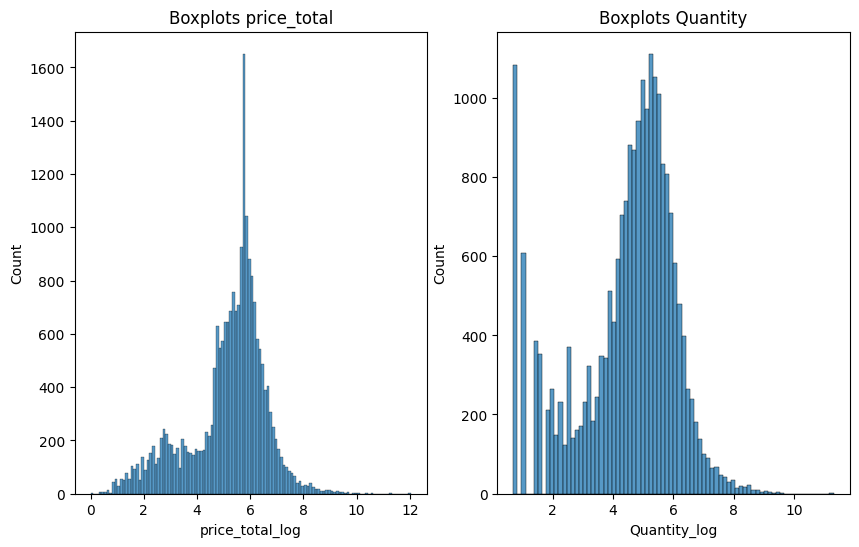

In [113]:
# Gráfico 2
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.histplot(df['price_total_log'])

plt.title('Boxplots price_total')



plt.subplot(122)
sns.histplot(df['Quantity_log'])


plt.title('Boxplots Quantity')
plt.show()

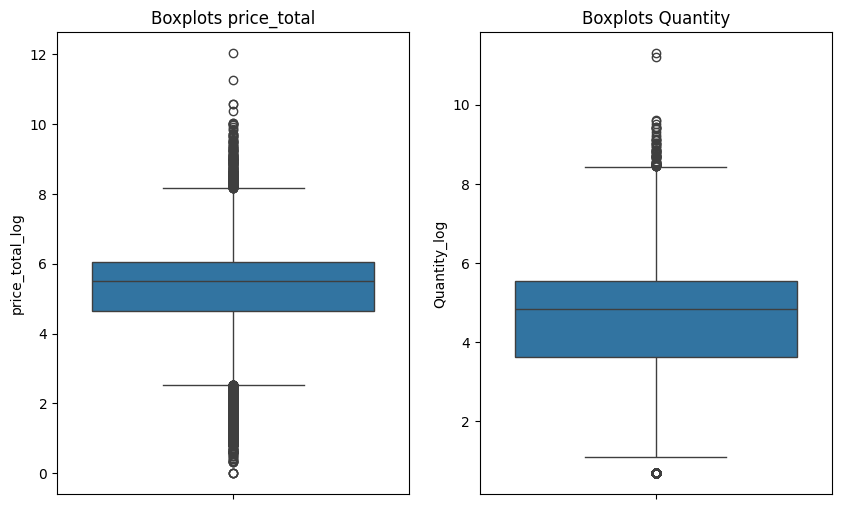

In [114]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total_log'])

plt.title('Boxplots price_total')



plt.subplot(122)
sns.boxplot(df['Quantity_log'])



plt.title('Boxplots Quantity')
plt.show()



In [115]:
outliers_index_pricetotal_log = outliers_index(df, 'price_total_log')
outliers_index_quantity_log = outliers_index(df, 'Quantity_log')


In [116]:
len(outliers_index_pricetotal_log)

1807

In [117]:
len(outliers_index_quantity_log)                                                                                                                                                                                                                                                                                                                                                                                                                                            

1150

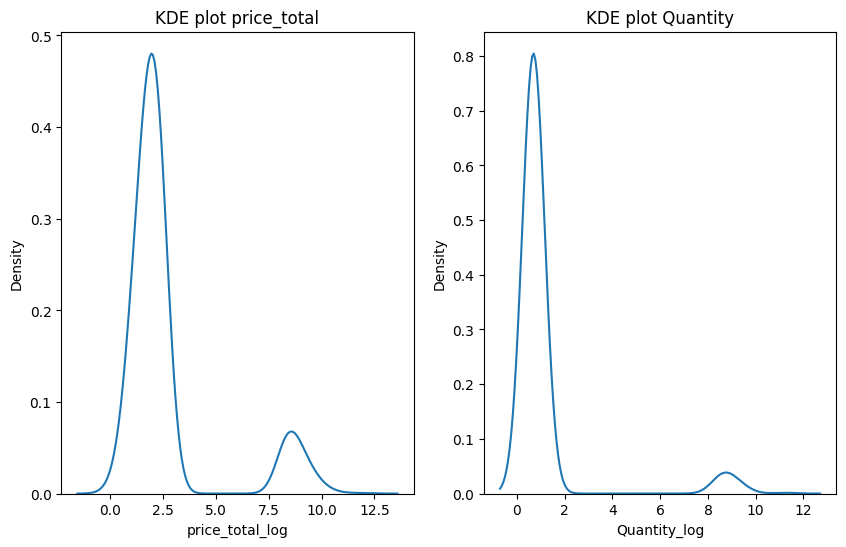

In [128]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.kdeplot(df.iloc[outliers_index_pricetotal_log]['price_total_log'])

plt.title('KDE plot price_total')



plt.subplot(122)
sns.kdeplot(df.iloc[outliers_index_quantity_log]['Quantity_log'])



plt.title('KDE plot Quantity')
plt.show()

In [ ]:
print(f'El total de registros antes de la eliminacion son: {df.shape[0]}')

El total de registros antes de la eliminacion son: 22190


In [ ]:
df.drop(index=outliers_index_pricetotal+outliers_index_quantity, inplace=True)


In [ ]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20163.0,139.393394,130.365181,1.0,29.000,106.0,211.000,586.0
price_total,20163.0,250.376144,203.358977,0.0,84.495,214.8,360.595,909.6


- La cantidad es normal que sea 1.
- Lo anormal que hay precios totales que son igual a 0

In [129]:
# Revisando los registros donde price_total es 0. 
df.loc[df['price_total']==0, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,price_total_log,Quantity_log
2703,543599,2011-02-10,17560,16,0.0,1,0.0,2.833213
11274,564651,2011-08-26,14646,576,0.0,4,0.0,6.357842
12820,568384,2011-09-27,12748,1,0.0,1,0.0,0.693147
17323,578841,2011-11-25,13256,12540,0.0,1,0.0,9.436759


In [130]:
df = df.loc[df['price_total']!=0, :]

In [ ]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20160.0,139.384722,130.332068,1.00,29.00,106.0,211.000,586.0
price_total,20160.0,250.413402,203.351168,0.38,84.68,214.8,360.655,909.6


In [131]:
df.sort_values(by='price_total',ascending=True).head(20)

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,price_total_log,Quantity_log
13760,570554,2011-10-11,14800,1,0.38,1,0.322083,0.693147
21259,570331,2011-10-10,14606,1,0.39,1,0.329304,0.693147
20511,561016,2011-07-22,14056,1,0.39,1,0.329304,0.693147
12566,567869,2011-09-22,16669,5,0.40,1,0.336472,1.791759
19135,543780,2011-02-11,17334,1,0.42,1,0.350657,0.693147
19311,545847,2011-03-07,15903,1,0.42,1,0.350657,0.693147
20417,559830,2011-07-13,16998,1,0.48,1,0.392042,0.693147
21446,573172,2011-10-28,16966,1,0.50,1,0.405465,0.693147
2363,542736,2011-01-31,14744,1,0.55,1,0.438255,0.693147
19266,545511,2011-03-03,18198,1,0.65,1,0.500775,0.693147


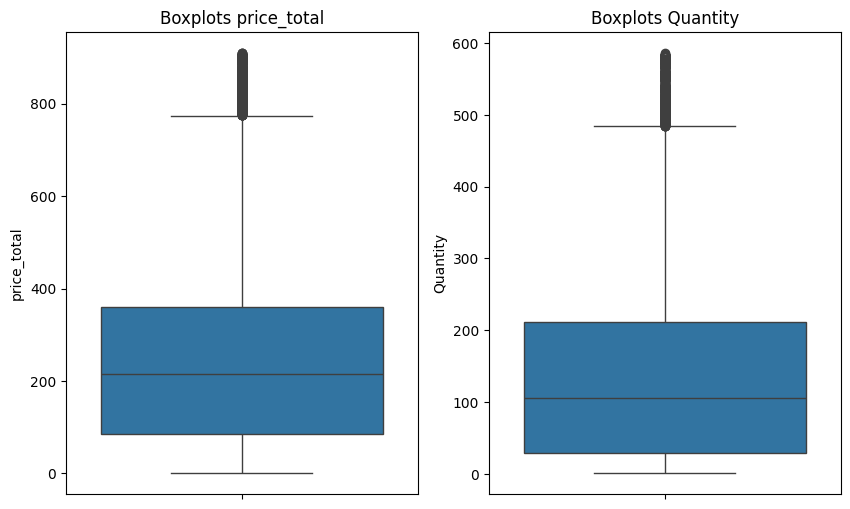

In [ ]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])

plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')
plt.show()

- Las distribuciones de los datos se encuentran en los parámetros esperados para nuestro contexto. Se favorecen lo totales mas bajos y las cantidades mas bajo también

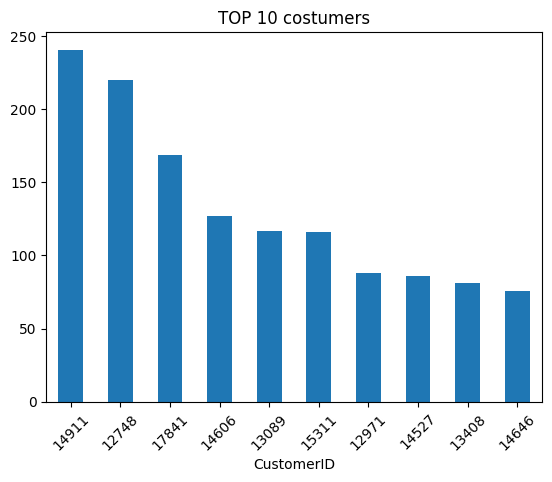

In [132]:
df.groupby('CustomerID')[['InvoiceNo']].size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('TOP 10 costumers')
plt.xticks(rotation=45)
plt.show()

In [133]:
df_ = df.copy()

In [134]:
df_.set_index('InvoiceDate',inplace=True)

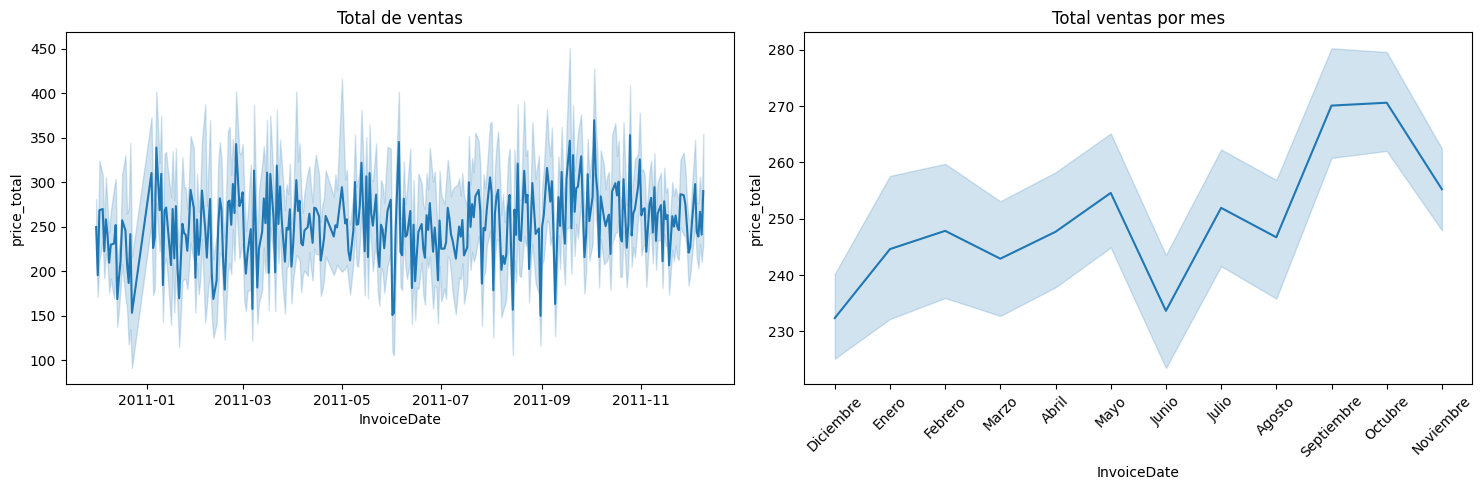

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.lineplot(data=df_, x=df_.index, y='price_total')
plt.title('Total de ventas')

plt.subplot(122)
sns.lineplot(data=df_, x=df_.index.month_name(locale='es_CL.utf8'), y='price_total')
plt.title('Total ventas por mes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


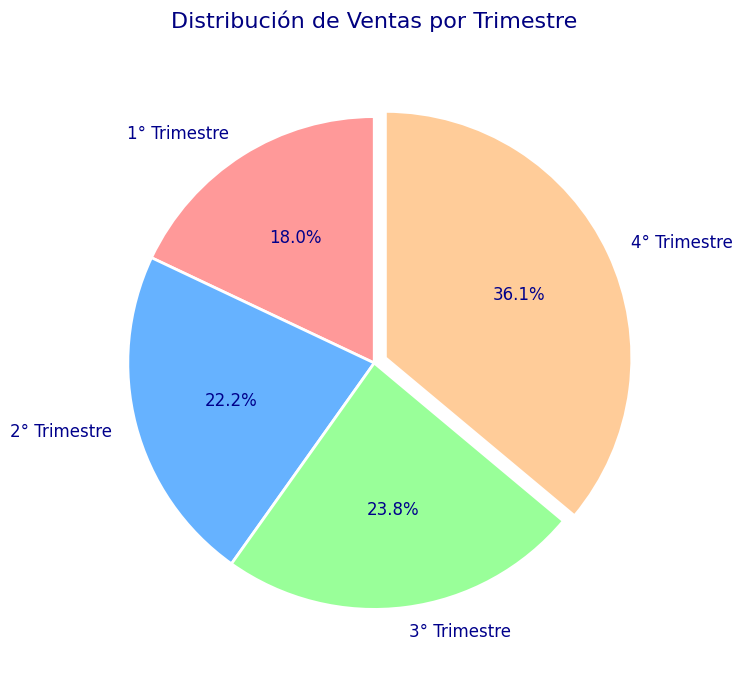

In [ ]:
labels_esp = ['1° Trimestre', '2° Trimestre', '3° Trimestre', '4° Trimestre']


# Definir colores atractivos para cada trimestre
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Crear el gráfico de pastel con mejoras visuales
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(
    df_.groupby(df_.index.quarter)['price_total'].sum(), 
    labels=labels_esp, 
    autopct='%1.1f%%',  # Mostrar porcentaje en cada sector
    startangle=90,      # Ángulo inicial para mejorar la visualización
    colors=colores,     # Colores personalizados
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Borde blanco para los sectores
    textprops={'fontsize': 12, 'color': 'darkblue'},    # Estilo de las etiquetas
    explode=(0, 0, 0, 0.05)  # Resaltar el primer trimestre
)

# Agregar un título llamativo
plt.title('Distribución de Ventas por Trimestre', fontsize=16, color='navy', pad=20)

# Mostrar el gráfico
plt.show()

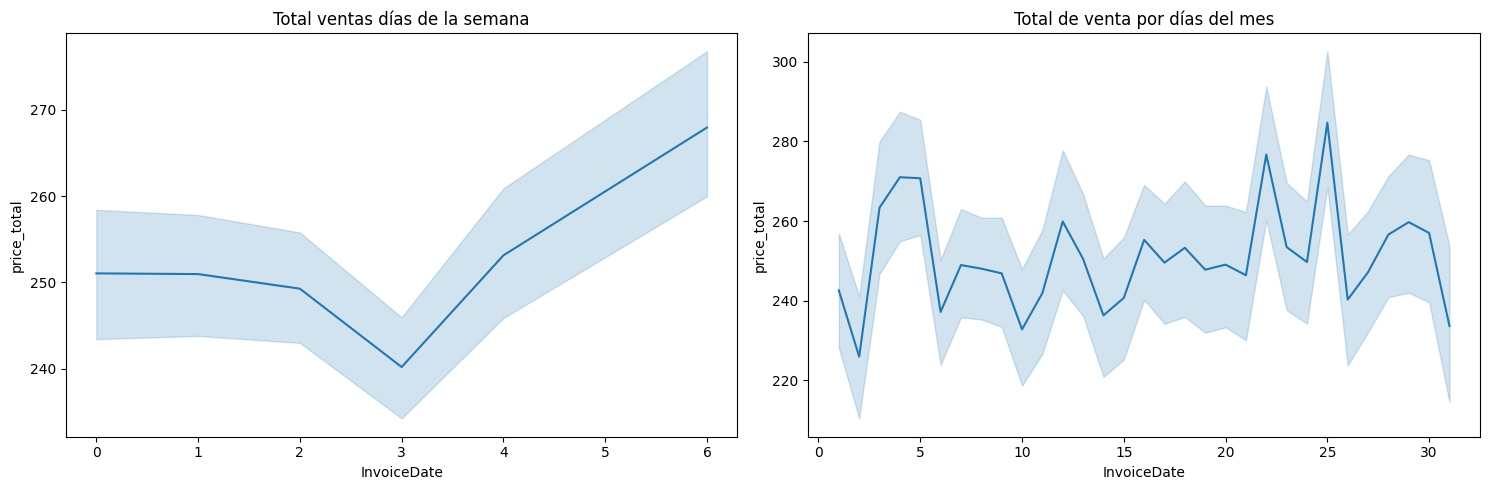

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)

sns.lineplot(data=df_, x=df_.index.weekday, y='price_total')
plt.title('Total ventas días de la semana')

plt.subplot(122)

sns.lineplot(data=df_, x=df_.index.day, y='price_total')
plt.title('Total de venta por días del mes')

plt.tight_layout()
plt.show()

# **Insights**

### **Tendencia general de ventas**
- Las ventas a lo largo del año no tienen una tendencia clara, manteniéndose más bien relativamente estacionarias. Sin embargo, hay ciertas fluctuaciones que merecen atención.

### **Análisis Trimestral**
- **Mejor trimestre:** El trimestre con mayor volumen de ventas corresponde al 4°.
- **Trimestres estacionarios:** Los trimestres que concentran la mayoría de las ventas en conjunto representan casi el 50% de las ventas.
- **Peor trimestre:** Se corresponde con el primer trimestre del año.

### **Análisis Mensual**
- **Mejores meses:** Septiembre - Octubre.
- **Peores meses:** Junio - Diciembre.
- **Ciclos de venta:**
  - Desde junio, donde se alcanza el mínimo de ventas, se observa un crecimiento sostenido de las ventas hasta septiembre y octubre, donde alcanzan su máximo.
  - Posteriormente, las ventas disminuyen gradualmente hasta que alcanzan su segundo mínimo del año.
  - Ya en este punto, se aprecia un aumento sostenido, menor al anteriormente mencionado, que culmina en el antes nombrado peor mes del año.

---

## **CONCLUSIONES**

### **Estrategias comerciales**
- Se podría analizar generar estrategias de ventas más agresivas para los meses de junio y diciembre.

### **Días de la semana**
- Analizar una reducción de recursos para el día miércoles puede ser una opción por la notable diferencia entre estos días con los demás.

### **Fines de semana y finales y comienzos del mes**
- Estar preparados con mayor stock para el último trimestre parece ser necesario. Además, durante el año, estar siempre atentos a los fines de semana.


## RFM

In [135]:
outliers_index_pricetotal = outliers_index(df, 'price_total')
outliers_index_quantity = outliers_index(df, 'Quantity')

df.drop(outliers_index_pricetotal + outliers_index_quantity, inplace=True)

/tmp/ipykernel_137118/4029955500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers_index_pricetotal + outliers_index_quantity, inplace=True)


In [136]:
# Primero agrupamos por el customerid ya que un mismo customer puede tener mas de 1 pedido. Después aplicamos el maximo para el invoiceDate para conocer la fecha de la ultima compra
fecha_maxima = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
fecha_maxima.columns = ['CustomerID', 'FechaReciente']

# Fusiona el DataFrame original con las fechas máximas
df_filtrado = pd.merge(df, fecha_maxima, on='CustomerID', how='left')

# Calcula la recencia para cada transacción
df_filtrado['Recencia'] = (df_filtrado['FechaReciente'] - df_filtrado['InvoiceDate']).dt.days
df_filtrado.drop(columns='FechaReciente', inplace=True)



In [137]:
#Frecuencia (F) para esto agrupamos por customer id y calculamos sobre InvoiceNo aplicando nunique para saber las comprar por clientes
frecuencia_cliente = df_filtrado.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frecuencia_cliente.columns = ['CustomerID', 'Frecuencia']
df_filtrado = pd.merge(df_filtrado, frecuencia_cliente, on='CustomerID', how='left')


In [138]:
#Monto (M) Agrupamos por customerId y sumamos todas las compras
monto_cliente = df_filtrado.groupby('CustomerID')['price_total'].sum().reset_index()
monto_cliente.columns = ['CustomerID', 'Monto']
df_filtrado = pd.merge(df_filtrado, monto_cliente, on='CustomerID', how='left')

Recencia (R): Se refiere al tiempo que ha pasado desde la última compra del cliente. Los clientes que han comprado más recientemente son considerados más activos y, por lo tanto, más propensos a realizar compras futuras.

Frecuencia (F): Mide la cantidad de veces que un cliente ha realizado una compra en un período determinado. Los clientes que compran con mayor frecuencia son valorados más altamente.

Monto (M): Indica el total de dinero gastado por el cliente en todas sus compras. Los clientes que gastan más dinero son considerados más valiosos para la empresa.

In [139]:
df_filtrado

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,price_total_log,Quantity_log,Recencia,Frecuencia,Monto
0,536365,2010-12-01,17850,40,139.12,7,4.942499,3.713572,71,19,4678.67
1,536366,2010-12-01,17850,12,22.20,2,3.144152,2.564949,71,19,4678.67
2,536367,2010-12-01,13047,83,278.73,12,5.633825,4.430817,342,18,3395.98
3,536368,2010-12-01,13047,15,70.05,4,4.263384,2.772589,342,18,3395.98
4,536369,2010-12-01,13047,3,17.85,1,2.936513,1.386294,342,18,3395.98
...,...,...,...,...,...,...,...,...,...,...,...
20006,581470,2011-12-08,17924,4,8.32,1,2.232163,1.609438,0,12,1456.15
20007,581490,2011-12-09,14397,23,32.53,2,3.512441,3.178054,0,23,2669.24
20008,581499,2011-12-09,15498,1,224.69,1,5.419162,0.693147,0,32,10040.23
20009,581568,2011-12-09,15311,5,54.75,1,4.020877,1.791759,0,99,32561.82


Index(['Recencia', 'Frecuencia', 'Monto'], dtype='object')


/home/kevin-llanos/projecto/venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


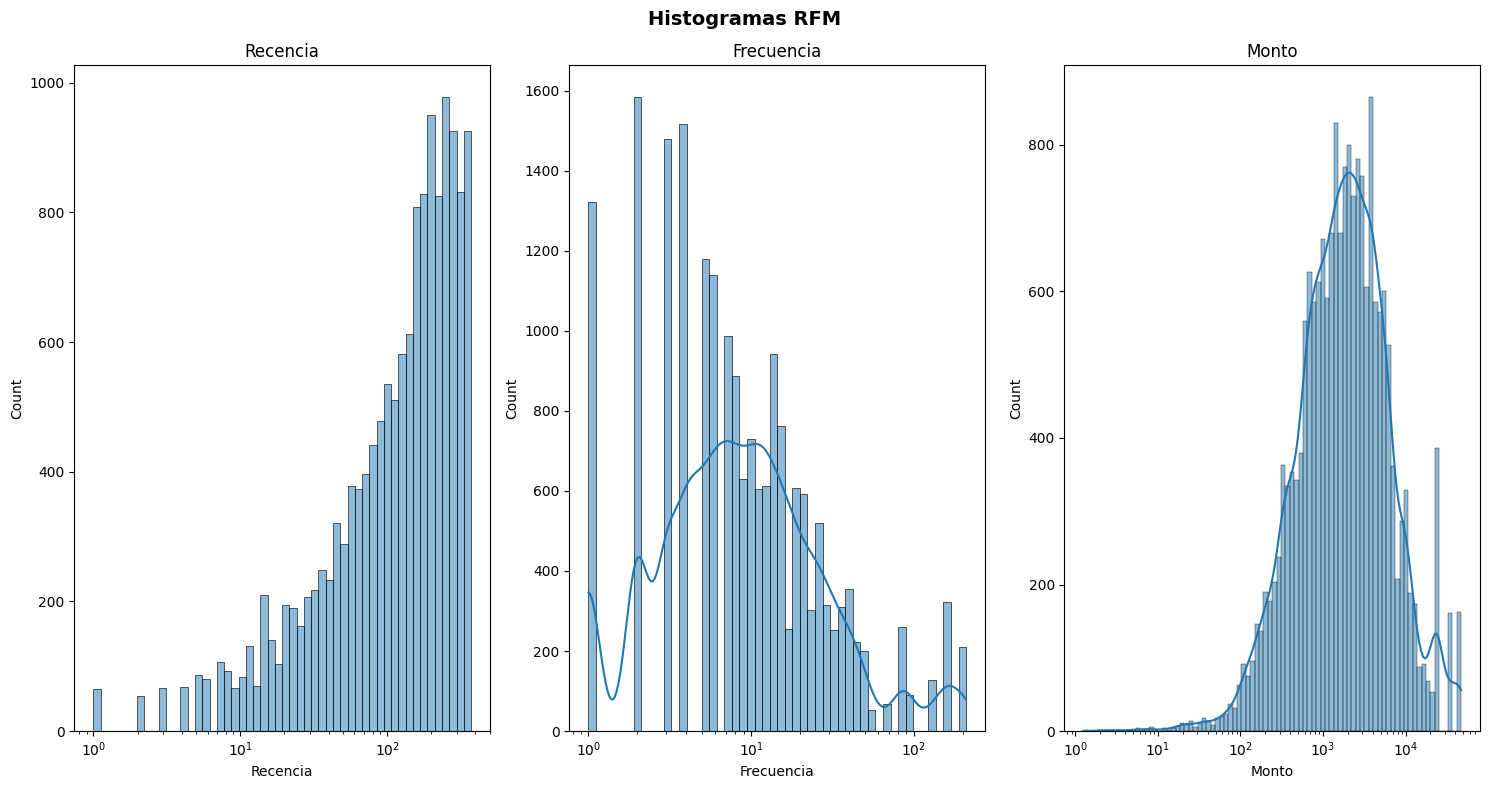

In [ ]:
columnas_rfm = df_filtrado.columns[8:]
print(columnas_rfm)
fig, axes = plt.subplots(1, len(columnas_rfm), figsize=(15, 8))

for i, col in enumerate(columnas_rfm):
    sns.histplot(df_filtrado[col], ax=axes[i], kde=True, log_scale=True)

    axes[i].set_title(col)
plt.suptitle('Histogramas RFM', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


### **Recencia**

- La mayoría de los clientes tienen reciencias altas lo que implica que en general no muchos clientes han realizado compras recientemente.
 
- Hay un pico significativo en la recencia más alta, lo que sugiere que hay un gran número de clientes inactivos o que no han realizado compras en mucho tiempo.

### **Frecuencia**

- Los compradores tienen tendencia a comprar de forma poco recurrente.  Existen algunos clientes con frecuencia alta quienes serian nuestros clientes más frecuentes
- Hay un pico en las frecuencias bajas, lo que indica que hay muchos clientes que solo han realizado unas pocas compras.
- A medida que la frecuencia aumenta, el número de clientes disminuye rápidamente, lo que sugiere que hay pocos clientes leales que realizan muchas compras.
- Buscar estrategias para fidelizar clientes y/o aumentar la frecuencia parece necesario en este caso.

### **Monto**

- La mayoría de los clientes generan montos bajos aunque hay clientes con montos significativamente más altos. Esto reafirma que la regla del 80/20 generan la mayor parte de los ingresos


## **CONCLUSIÓN**

- La mayoria de los clientes son inactivos, realizando pocas compras y de  bajo valor
- Campañas de reactivación de clientes parecen ser necesarias.


In [140]:
recency_threshold = df_filtrado["Recencia"].quantile(0.2)

# Filtrar los usuarios nuevos (aquellos con recencia menor o igual al umbral)
new_users = df_filtrado[df_filtrado["Recencia"] <= recency_threshold]


new_users

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,price_total_log,Quantity_log,Recencia,Frecuencia,Monto
14,536384,2010-12-01,18074,190,489.60,13,6.195629,5.252273,0,1,489.60
20,536393,2010-12-01,13747,8,79.60,1,4.389499,2.197225,0,1,79.60
28,536403,2010-12-01,12791,97,192.60,2,5.265794,4.584967,0,1,192.60
33,536409,2010-12-01,17908,173,243.28,58,5.498315,5.159055,0,1,243.28
37,536420,2010-12-01,16583,111,233.45,14,5.457242,4.718499,0,1,233.45
...,...,...,...,...,...,...,...,...,...,...,...
20006,581470,2011-12-08,17924,4,8.32,1,2.232163,1.609438,0,12,1456.15
20007,581490,2011-12-09,14397,23,32.53,2,3.512441,3.178054,0,23,2669.24
20008,581499,2011-12-09,15498,1,224.69,1,5.419162,0.693147,0,32,10040.23
20009,581568,2011-12-09,15311,5,54.75,1,4.020877,1.791759,0,99,32561.82


In [141]:
df_filtrado.to_csv('data/training_data.csv')